In [24]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from sklearn.compose import ColumnTransformer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

### Loading our cleaned data and taking a look

In [25]:
df = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 4/cleaned_tweets.csv')

In [26]:
df.head()

,Unnamed: 0,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,processed_text,sentiment_score,bigrams,bigram_presence,Android,Android App,Apple,Google,Other Apple product or service,Other Google product or service,iPad,iPad or iPhone App,iPhone,joined_processed_text
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"['wesley83', 'iphon', 'hr', 'tweet', 'rise_aus...",-0.6800,"[('dead', 'need'), ('hr', 'tweet'), ('iphon', ...",0,False,False,False,False,False,False,False,False,True,wesley83 iphon hr tweet rise_austin dead need ...
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"['jessede', 'know', 'fludapp', 'awesom', 'ipad...",0.9100,"[('also', 'give'), ('app', 'like'), ('appreci'...",1,False,False,False,False,False,False,False,True,False,jessede know fludapp awesom ipad iphon app lik...
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"['swonderlin', 'wait', 'ipad', 'also', 'sale',...",0.0000,"[('also', 'sale'), ('ipad', 'also'), ('sale', ...",0,False,False,False,False,False,False,True,False,False,swonderlin wait ipad also sale sxsw
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"['sxsw', 'hope', 'year', 'festiv', 'crashi', '...",0.7269,"[('app', 'sxsw'), ('crashi', 'year'), ('festiv...",1,False,False,False,False,False,False,False,True,False,sxsw hope year festiv crashi year iphon app sxsw
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"['sxtxstate', 'great', 'stuff', 'fri', 'sxsw',...",0.6249,"[('amp', 'matt'), ('book', 'confer'), ('confer...",0,False,False,False,True,False,False,False,False,False,sxtxstate great stuff fri sxsw marissa mayer g...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          8936 non-null   int64  
 1   tweet_text                                          8936 non-null   object 
 2   emotion_in_tweet_is_directed_at                     3282 non-null   object 
 3   is_there_an_emotion_directed_at_a_brand_or_product  8936 non-null   object 
 4   processed_text                                      8936 non-null   object 
 5   sentiment_score                                     8936 non-null   float64
 6   bigrams                                             8936 non-null   object 
 7   bigram_presence                                     8936 non-null   int64  
 8   Android                                             8936 non-null   bool   
 9

## Creating our Train/Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[['joined_processed_text', 'sentiment_score', 'bigram_presence', 
                                                         'Android', 'Android App', 'Apple', 'Google', 'iPad', 'iPhone']],
                                                    df['is_there_an_emotion_directed_at_a_brand_or_product'], 
                                                    test_size=.3, random_state=2021)

#### Creating transformer for TFIDF for oly the text column, passing through all other features

In [29]:
transformer = ColumnTransformer(
    [('tfidf', TfidfVectorizer(), 'joined_processed_text')],
    remainder='passthrough')

In [30]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

#### Training our model using SMOTE since our target data is imbalanced

In [31]:
sm_tfidf = SMOTE()
X_train, y_train = sm_tfidf.fit_resample(X_train, y_train)

#### Fitting our training data to a RandomForestClassifier

In [32]:
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Plotting a confusion matrix of our model's prediction on our test data and getting acurracy scores

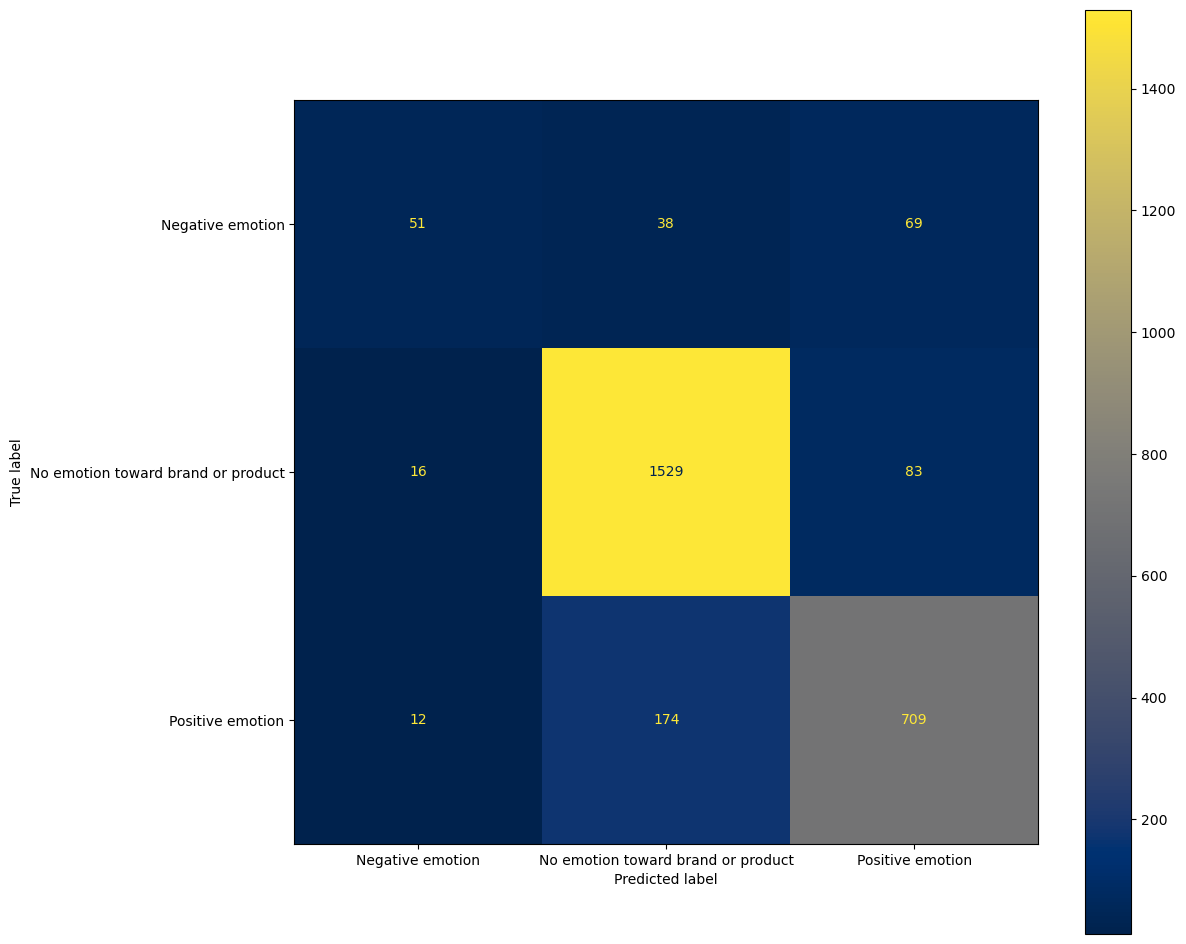

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap="cividis");

In [34]:
# Train accuracy
classifier.score(X_train, y_train)

0.9983156028368795

In [35]:
# Test accuracy
classifier.score(X_test, y_test)

0.8537859007832899

## Testing other models

#### DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

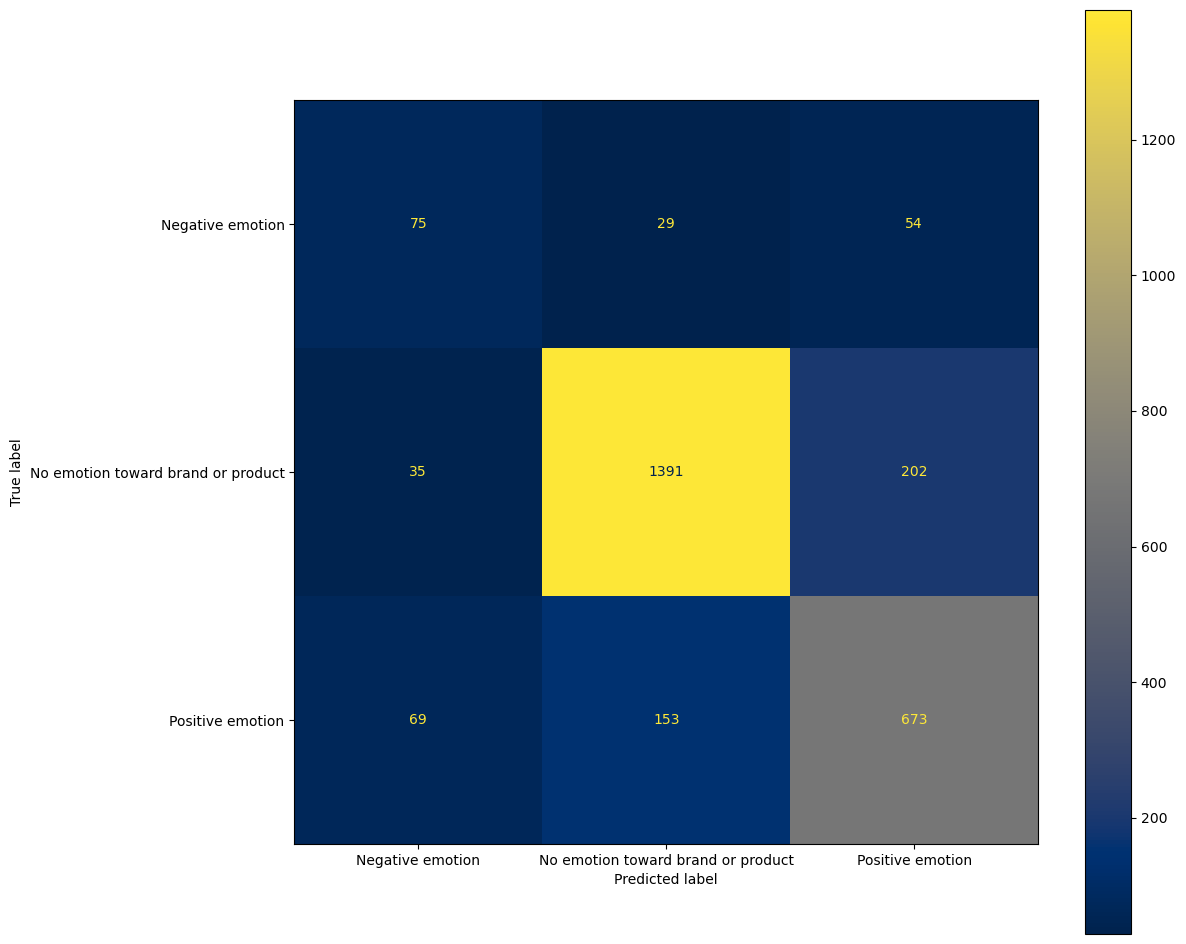

In [37]:
fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=ax, cmap="cividis");

In [38]:
# Train accuracy
dt.score(X_train, y_train)

0.9983156028368795

In [39]:
# Test accuracy
dt.score(X_test, y_test)

0.7978366281238344

#### Logistic Regression

In [40]:
lr = LogisticRegression(max_iter=1000)

In [41]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

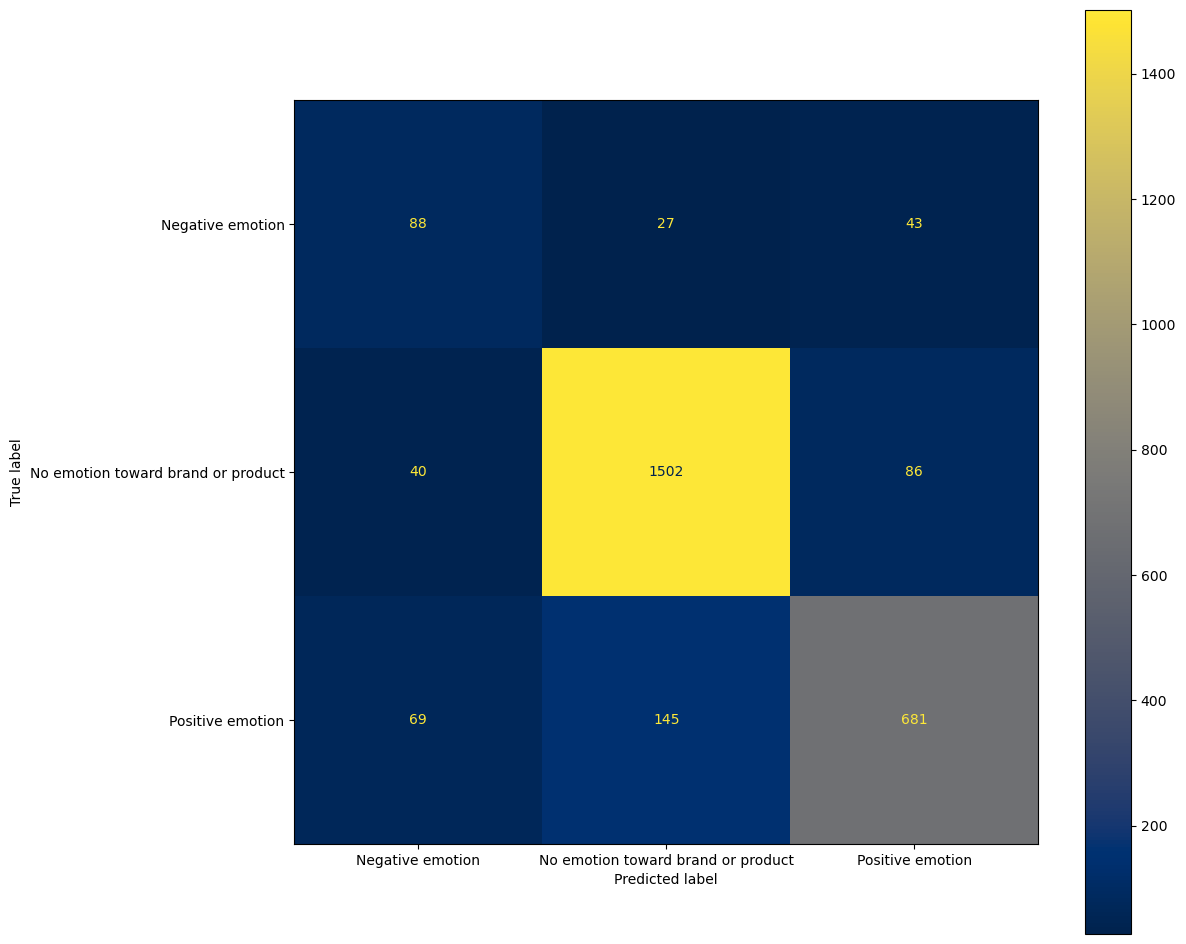

In [42]:
fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, ax=ax, cmap="cividis");

In [43]:
lr.score(X_train, y_train)

0.9344858156028368

In [44]:
lr.score(X_test, y_test)

0.8470719880641552

#### XGBoost Classifier

In [45]:
# Instantiate the encoder
encoder = LabelEncoder()

# Fit and transform the training data
y_train = pd.Series(encoder.fit_transform(y_train))

# Transform the test data
y_test = pd.Series(encoder.transform(y_test))

In [47]:
# Instantiate XGBClassifier
xg = XGBClassifier()

# Fit XGBClassifier
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

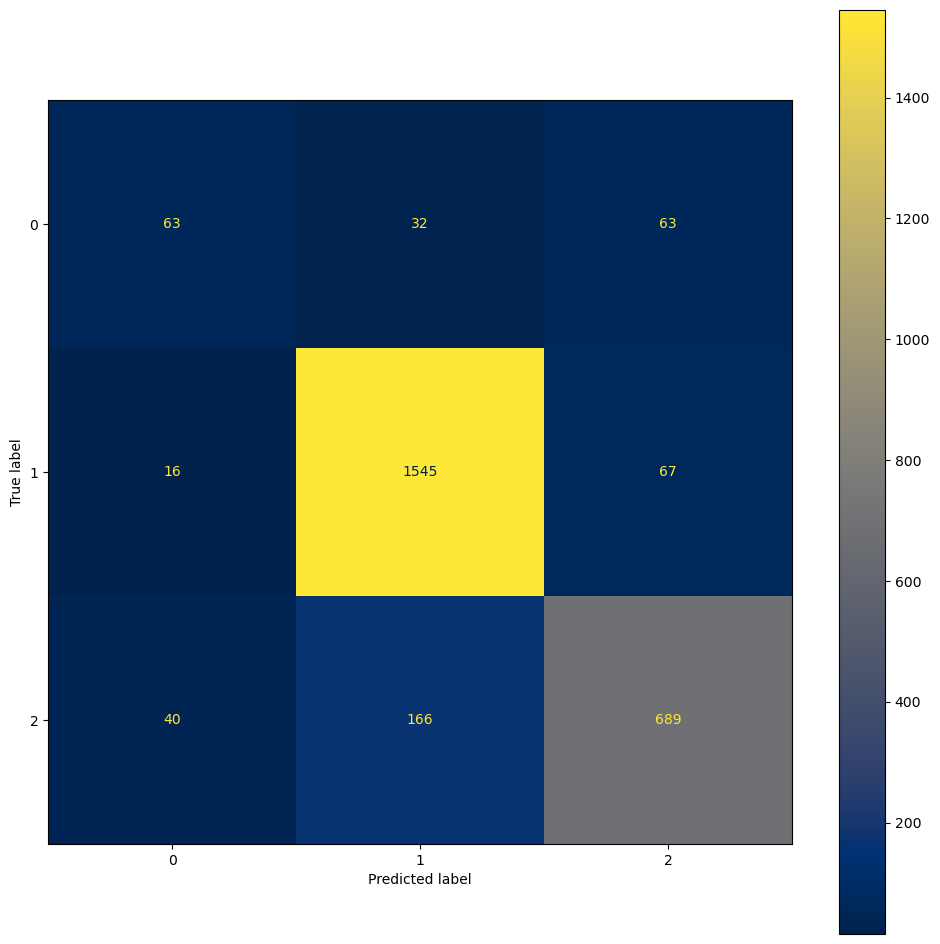

In [48]:
fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(xg, X_test, y_test, ax=ax, cmap="cividis");

In [49]:
xg.score(X_train, y_train)

0.9566489361702127

In [50]:
xg.score(X_test, y_test)

0.8567698619917941

#### After trying 4 different models, the XGBoost seems to be our best one. We're going to try some hypertuning to see if we find any further improvements

In [51]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 8],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 200],
}

In [52]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 8
min_child_weight: 1
n_estimators: 200
subsample: 0.7

Training Accuracy: 98.64%
Validation accuracy: 85.45%


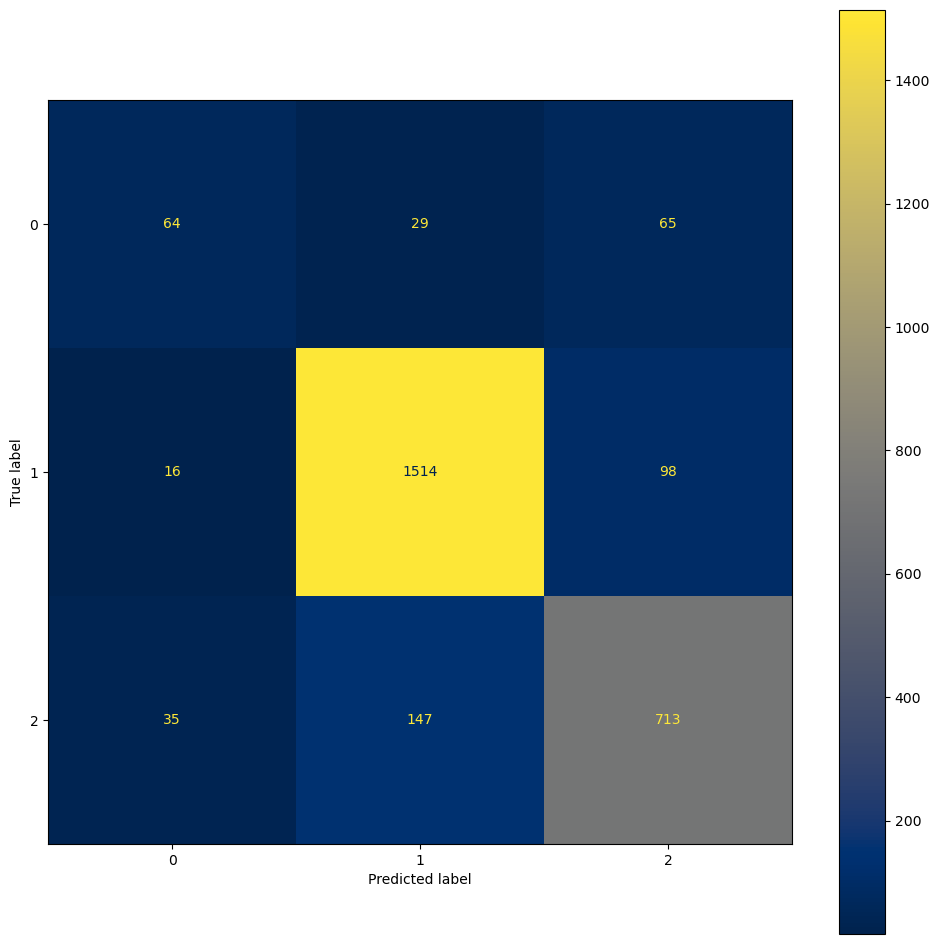

In [55]:
fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(grid_xg, X_test, y_test, ax=ax, cmap="cividis");

In [53]:
param_grid2 = {
    'learning_rate': [0.2, 0.3],
    'max_depth': [8, 10, 11],
    'min_child_weight': [1, 2],
    'subsample': [0.7, 0.9],
    'n_estimators': [200, 300],
}

In [54]:
grid_xg2 = GridSearchCV(xg, param_grid2, scoring='accuracy', cv=None, n_jobs=1)
grid_xg2.fit(X_train, y_train)

best_parameters = grid_xg2.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg2.predict(X_train)
test_preds = grid_xg2.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 10
min_child_weight: 1
n_estimators: 200
subsample: 0.7

Training Accuracy: 99.52%
Validation accuracy: 85.9%


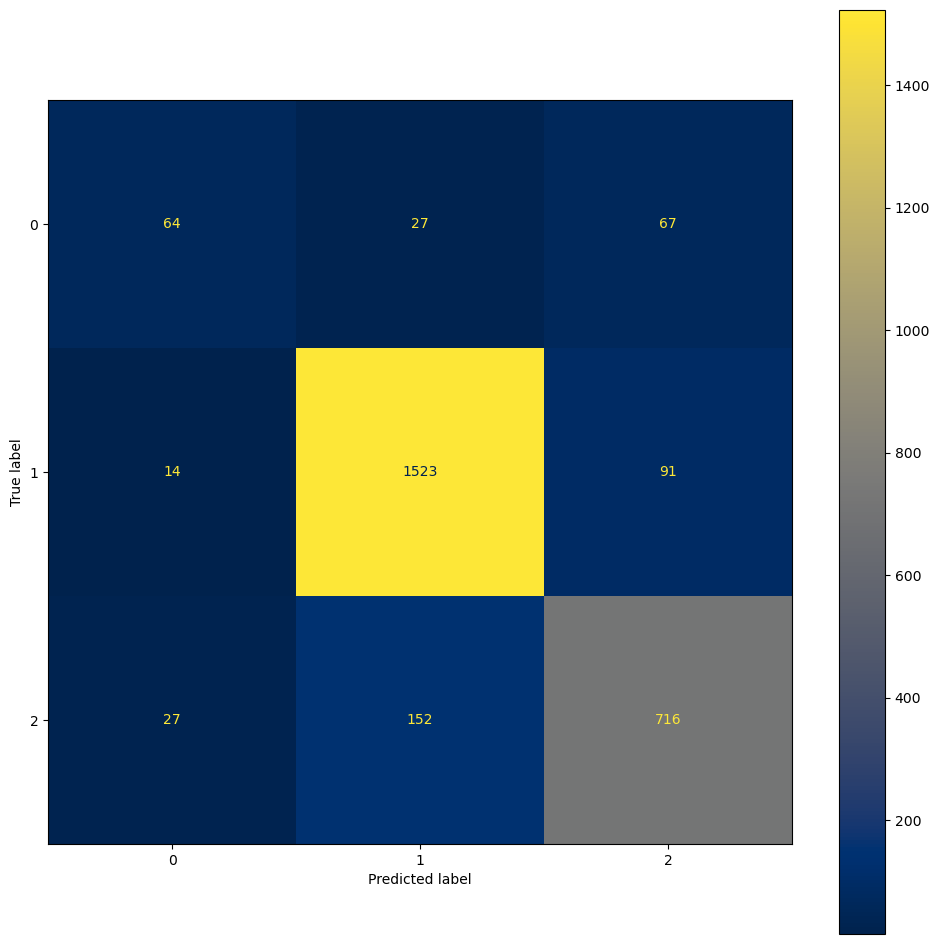

In [56]:
fig, ax = plt.subplots(figsize=(12,12))
ConfusionMatrixDisplay.from_estimator(grid_xg2, X_test, y_test, ax=ax, cmap="cividis");

#### After trying a couple grid searches to tune hyperparameters with XGBoost, there was very little to no improvement. Considering that, we settled on the simpler model with default hyperparameters on for our final model.